# Fake vs Real Bank notes using Neural Networks

Importing Libraries & Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

EDA

In [4]:
def read_dataset():
    df=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\banknotes.csv")
    X=df[df.columns[0:4]].values                   #sonar values from 1 to last column
    y=df[df.columns[4]]                            #last column value of R or M
    
    #encode the dependent variable
    encode=LabelEncoder()
    encode.fit(y)
    y=encode.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return (X,Y)

In [5]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [6]:
X,Y=read_dataset()

(1372, 4)


In [7]:
X,Y=shuffle(X,Y, random_state=1)                         #to shuffle the data or to mix columns & rows

In [8]:
#train and test split
train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

In [9]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(1097, 4)
(1097, 2)
(275, 4)


In [10]:
#Define the parameters
learning_rate=0.3
training_epochs=100
cost_history=np.empty(shape=[1], dtype=float)
n_dim=X.shape[1]
print("n_dim=",n_dim)
n_class=2
model_path="C:\\Users\\Parth Salke"

n_dim= 4


In [11]:
#define number of hidden layers and no. of neurons
n_hidden_1=10
n_hidden_2=10
n_hidden_3=10
n_hidden_4=10

In [12]:
x=tf.placeholder(tf.float32, [None,n_dim])
W=tf.Variable(tf.zeros([n_dim, n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32, [None,n_class])

In [13]:
#define model
def multilayer_perceptron(x,weights,biases):
    
    #hidden layer with activation function
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    #hidden layer with activation function
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    #hidden layer with activation function
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    #hidden layer with activation function
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_4)
    
    #output layer with linear activation
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

In [14]:
#define weights and biases for each layer
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [15]:
#initilize all variables
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [16]:
#call model 
y=multilayer_perceptron(x,weights,biases)

In [18]:
#Define loss and optimizer
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_steps=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [19]:
sess=tf.Session()
sess.run(init)

In [25]:
#calculate loss and accuracy for each epoch
mse_history=[]
accuracy_history=[]

for epoch in range(training_epochs):
    sess.run(training_steps, feed_dict={x:train_x, y_: train_y}) 
    cost=sess.run(cost_function, feed_dict={x: train_x, y_: train_y}) 
    cost_history = np.append(cost_history, cost) 
    correct_prediction = tf.equal(tf.argmax (y, 1), tf.argmax (y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #print("Accuracy: ", (sess.run(accuracy, feed_dict=(x: test_x, y: test y))))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse= tf.reduce_mean(tf.square(pred_y-test_y))
    mse_=sess.run(mse) 
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy, feed_dict={x:train_x, y_: train_y})) 
    accuracy_history.append(accuracy) 
    print("epoch: ", epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "-Train Accuracy: ", accuracy)
    

epoch:  0  -  cost:  0.14695655  - MSE:  3.020159948414111 -Train Accuracy:  0.976299
epoch:  1  -  cost:  0.14388554  - MSE:  3.041420162201142 -Train Accuracy:  0.9772106
epoch:  2  -  cost:  0.14090705  - MSE:  3.062752464759125 -Train Accuracy:  0.9772106
epoch:  3  -  cost:  0.13801813  - MSE:  3.084149055922991 -Train Accuracy:  0.9772106
epoch:  4  -  cost:  0.13521577  - MSE:  3.1056026570547863 -Train Accuracy:  0.9772106
epoch:  5  -  cost:  0.13249715  - MSE:  3.127106329451986 -Train Accuracy:  0.9772106
epoch:  6  -  cost:  0.12985942  - MSE:  3.1486528892918 -Train Accuracy:  0.9799453
epoch:  7  -  cost:  0.12729986  - MSE:  3.1702355890215266 -Train Accuracy:  0.9808569
epoch:  8  -  cost:  0.12481585  - MSE:  3.1918483560227204 -Train Accuracy:  0.9817685
epoch:  9  -  cost:  0.12240485  - MSE:  3.21348439264011 -Train Accuracy:  0.9790337
epoch:  10  -  cost:  0.12006437  - MSE:  3.235137812719393 -Train Accuracy:  0.9790337
epoch:  11  -  cost:  0.11779211  - MSE:  3

epoch:  93  -  cost:  0.04136967  - MSE:  4.847498786775715 -Train Accuracy:  0.9917958
epoch:  94  -  cost:  0.040993743  - MSE:  4.864137643776842 -Train Accuracy:  0.9917958
epoch:  95  -  cost:  0.04062259  - MSE:  4.880717538542231 -Train Accuracy:  0.9917958
epoch:  96  -  cost:  0.04025611  - MSE:  4.8972389491276 -Train Accuracy:  0.9917958
epoch:  97  -  cost:  0.039894216  - MSE:  4.913702451434819 -Train Accuracy:  0.9917958
epoch:  98  -  cost:  0.03953677  - MSE:  4.930108010624544 -Train Accuracy:  0.9917958
epoch:  99  -  cost:  0.03918371  - MSE:  4.9464571746181845 -Train Accuracy:  0.9917958


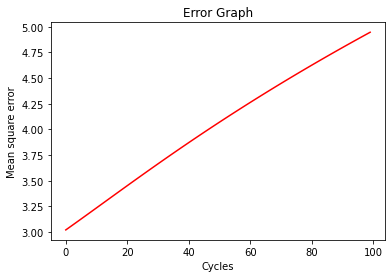

<function matplotlib.pyplot.show(*args, **kw)>

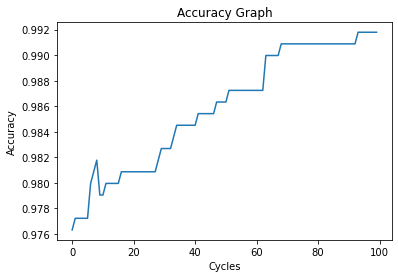

In [26]:
#plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.title("Error Graph")
plt.xlabel("Cycles")
plt.ylabel("Mean square error")
plt.show()
plt.plot(accuracy_history)
plt.title("Accuracy Graph")
plt.xlabel("Cycles")
plt.ylabel("Accuracy")
plt.show

In [27]:
#print final accuracy
correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

Test accuracy:  0.99636364


In [28]:
#Print final mean square error
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f"% sess.run(mse))

MSE: 4.9465


# Restore or test Dataset

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
def read_dataset():
    df=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\banknotes.csv")
    X=df[df.columns[0:4]].values                   #sonar values from 1 to last column
    y1=df[df.columns[4]]                            #last column value of R or M
    #encode the dependent variable
    encode=LabelEncoder()
    encode.fit(y1)
    y=encode.transform(y1)
    Y=one_hot_encode(y)
    print(X.shape)
    return (X,Y,y1)
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode
X,Y,y1=read_dataset()
model_path="C:\\Users\\Parth Salke"
learning_rate=0.3
training_epochs=100
cost_history=np.empty(shape=[1], dtype=float)
n_dim=4
n_class=2


(1372, 4)


In [30]:
#define number of hidden layers and no. of neurons
n_hidden_1=10
n_hidden_2=10
n_hidden_3=10
n_hidden_4=10
x=tf.placeholder(tf.float32, [None,n_dim])
W=tf.Variable(tf.zeros([n_dim, n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32, [None,n_class])
#define model
def multilayer_perceptron(x,weights,biases):
    
    #hidden layer with activation function
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    #hidden layer with activation function
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    #hidden layer with activation function
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    #hidden layer with activation function
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_4)
    
    #output layer with linear activation
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer
#define weights and biases for each layer
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [31]:
#initilize all variables
init=tf.global_variables_initializer()
saver=tf.train.Saver()
#call model 
y=multilayer_perceptron(x,weights,biases)
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_steps=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [32]:

sess=tf.Session()
sess.run(init)
saver.restore(sess,model_path)

INFO:tensorflow:Restoring parameters from C:\Users\Parth Salke


DataLossError: Graph execution error:

Detected at node 'save_1/RestoreV2' defined at (most recent call last):
    File "C:\Users\Parth Salke\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Parth Salke\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
      app.start()
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Parth Salke\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\Parth Salke\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\Parth Salke\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2866, in run_cell
      result = self._run_cell(
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
      return runner(coro)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3071, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-31-18f2727b746f>", line 3, in <module>
      saver=tf.train.Saver()
Node: 'save_1/RestoreV2'
Unable to open table file C:\Users\Parth Salke: UNKNOWN: NewRandomAccessFile failed to Create/Open: C:\Users\Parth Salke : Access is denied.
; Input/output error
	 [[{{node save_1/RestoreV2}}]]

Original stack trace for 'save_1/RestoreV2':
  File "C:\Users\Parth Salke\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Parth Salke\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Parth Salke\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\Parth Salke\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\Parth Salke\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-18f2727b746f>", line 3, in <module>
    saver=tf.train.Saver()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 919, in __init__
    self.build()
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 931, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 959, in _build
    self.saver_def = self._builder._build_internal(  # pylint: disable=protected-access
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 529, in _build_internal
    restore_op = self._AddRestoreOps(filename_tensor, saveables,
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 349, in _AddRestoreOps
    all_tensors = self.bulk_restore(filename_tensor, saveables, preferred_shard,
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 597, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1500, in restore_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 740, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3776, in _create_op_internal
    ret = Operation(
  File "C:\Users\Parth Salke\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2175, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


In [33]:
prediction=tf.argmax(y,1)
correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [34]:
print("******************************************")
print("0 stands for Fake Note and 1 stands for Real Note")
print("******************************************")
for i in range(754,768):
    prediciton_run=sess.run(prediction, feed_dict={x: X[i].reshape(1,4)})
    accuracy_run=sess.run(accuracy, feed_dict={x: X[i].reshape(1,4)})
    print("Original class: ", y1=[i], "predicted class: ",prediciton_run)

SyntaxError: positional argument follows keyword argument (<ipython-input-34-45f8cc20df38>, line 7)